### Import required Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Problem Statement

### 2. Data Gathering

In [2]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
df.shape

(150, 6)

In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [33]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
df.describe()   # Numerical columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 3. Exploratory Data Analysis

In [36]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [39]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


C:\Users\Chandrashekhar\anaconda3\envs\Saisha\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

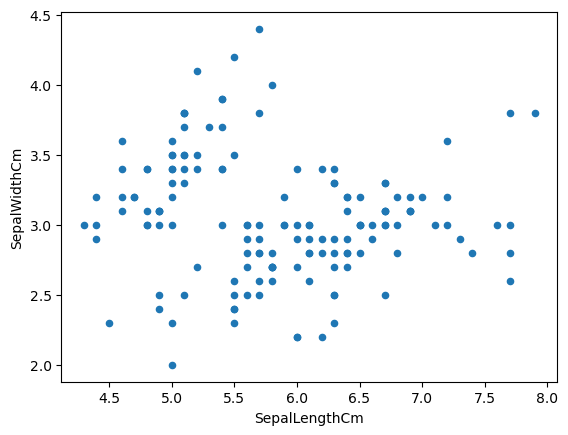

In [40]:
df.plot(x = 'SepalLengthCm', y='SepalWidthCm', kind='scatter')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

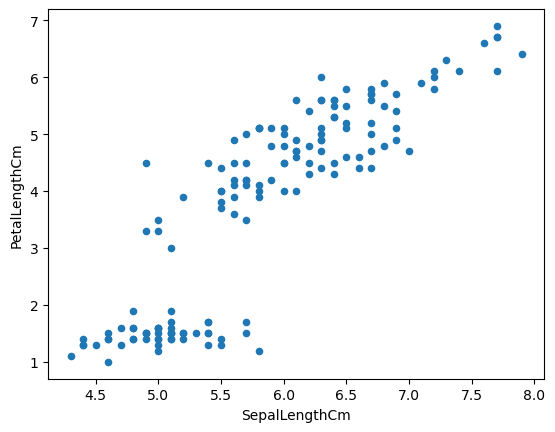

In [41]:
df.plot(x = 'SepalLengthCm', y='PetalLengthCm', kind='scatter')

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

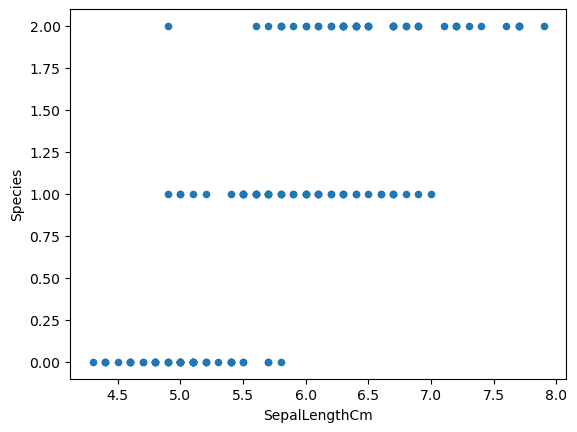

In [42]:
df.plot(x = 'SepalLengthCm', y='Species', kind='scatter')

<Figure size 3000x3000 with 0 Axes>

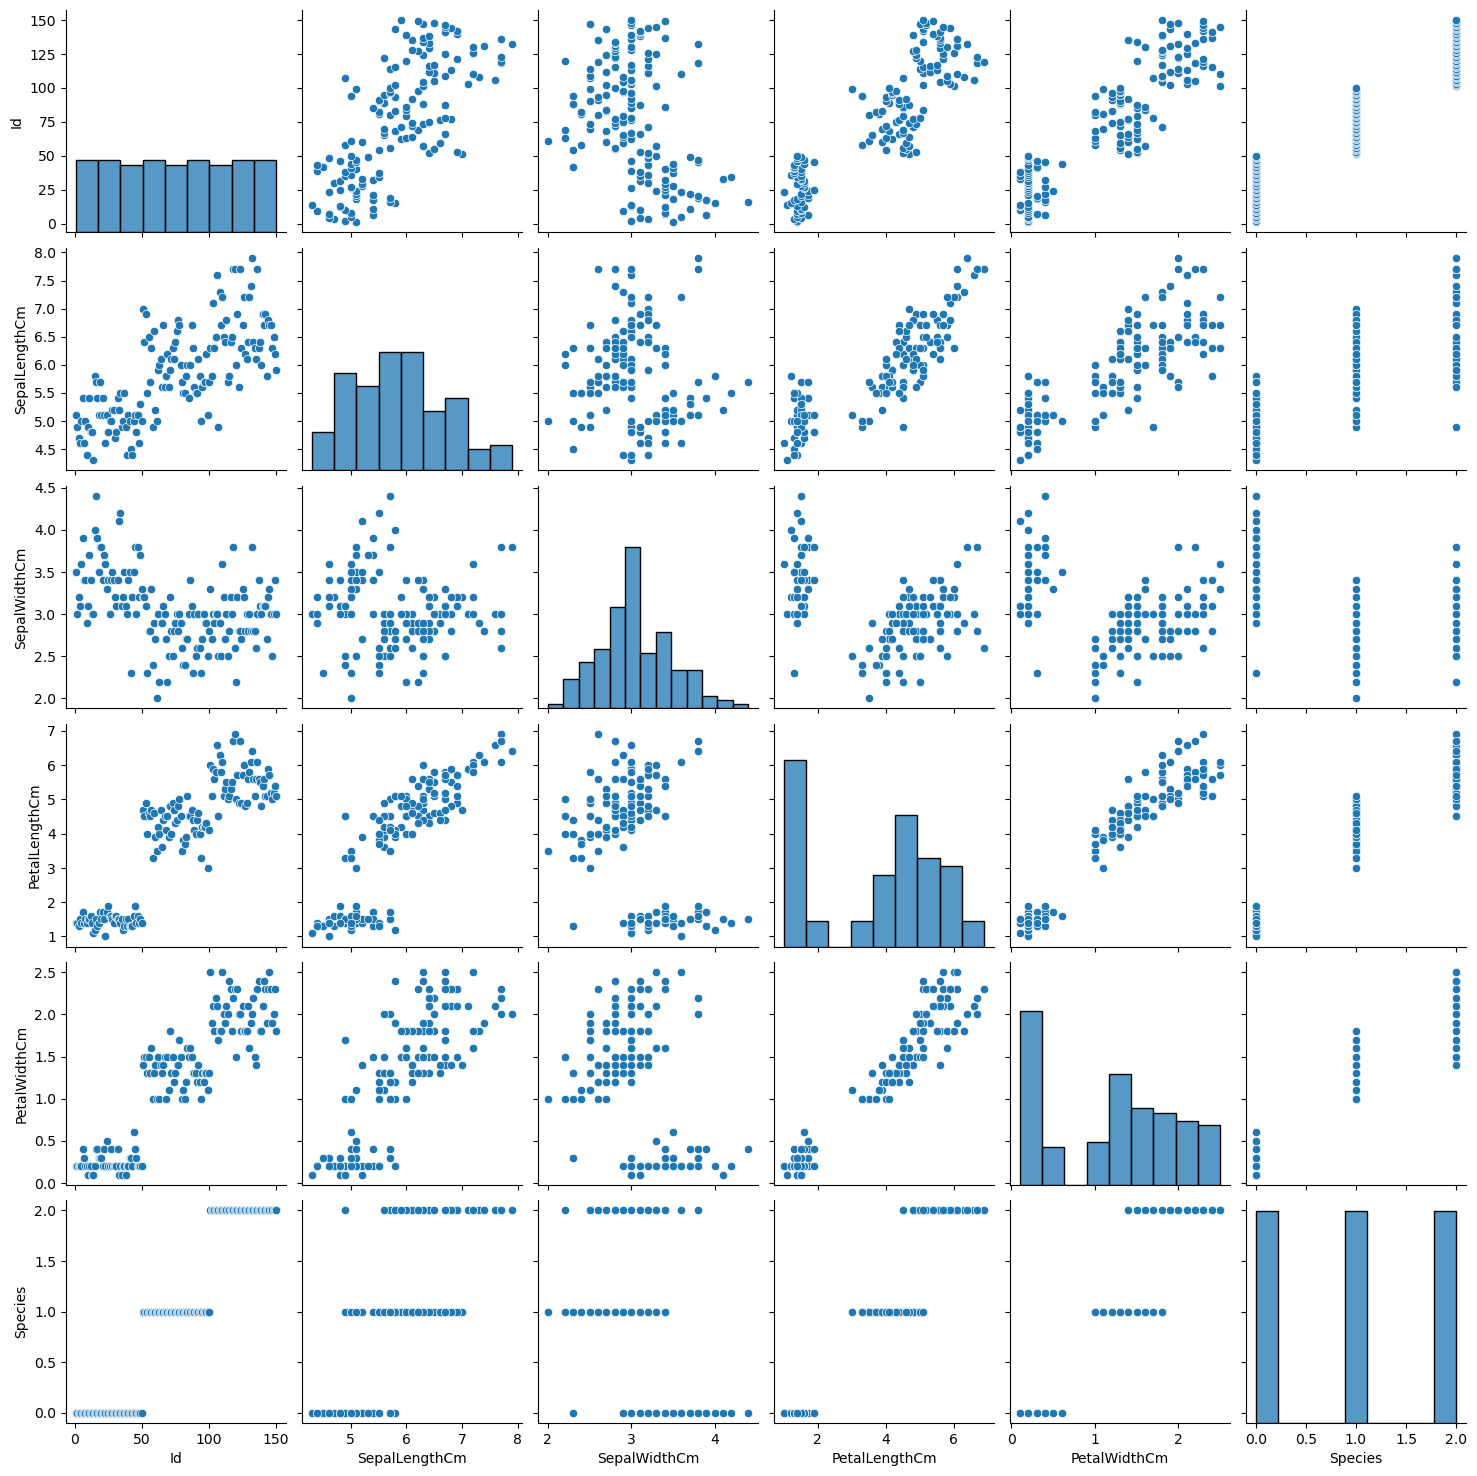

In [43]:
plt.figure(figsize=(30,30))
sns.pairplot(df, kind='scatter')

C:\Users\Chandrashekhar\anaconda3\envs\Saisha\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Species', ylabel='Species'>

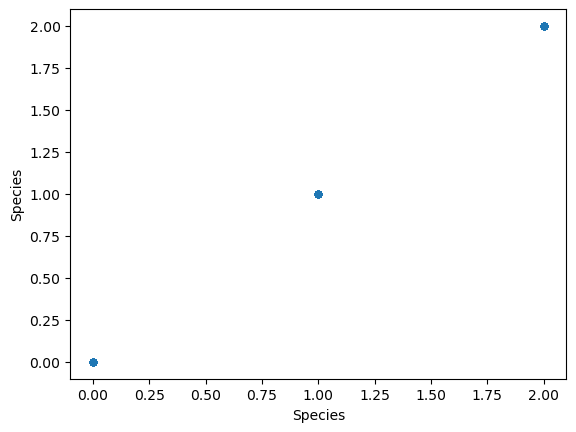

In [46]:
df.plot(x = 'Species', y='Species', kind='scatter')

<Axes: xlabel='Id', ylabel='Id'>

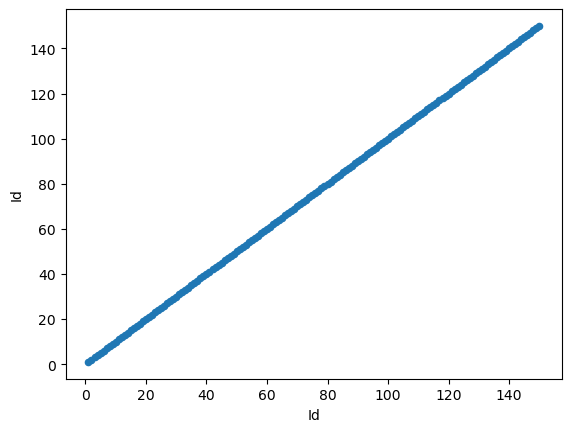

In [48]:
df.plot(x = 'Id', y='Id', kind='scatter')

<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>

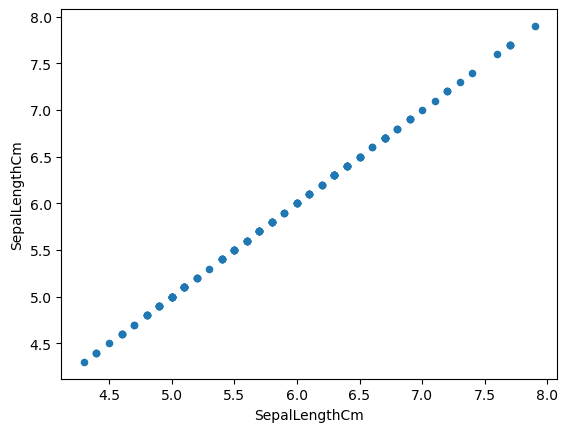

In [49]:
df.plot(x = 'SepalLengthCm', y='SepalLengthCm', kind='scatter')

In [44]:
# plt.figure(figsize=(30,30))
# sns.pairplot(df, kind='kde')

In [45]:
# plt.figure(figsize=(30,30))
# sns.pairplot(df, kind='hist')

In [50]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

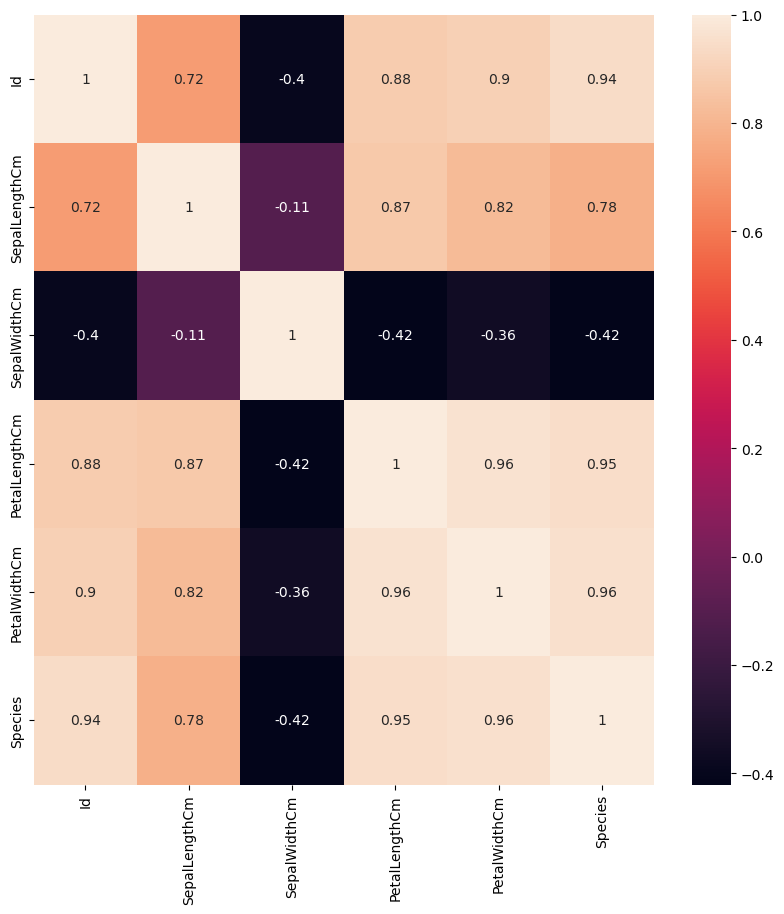

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<Axes: >

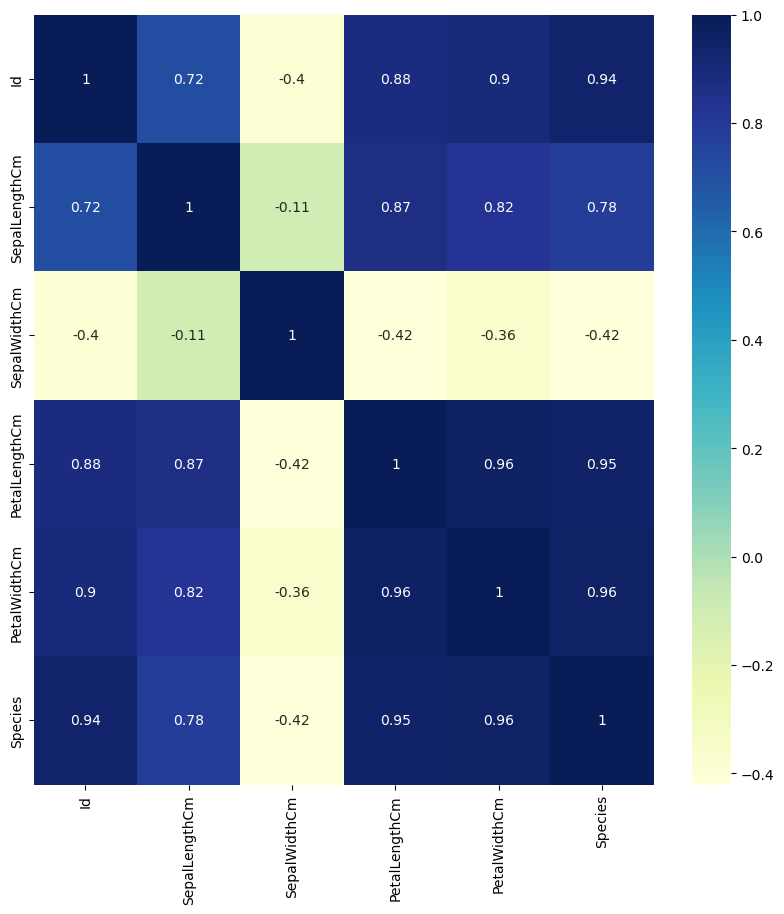

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

### 4. Feature Engineering

In [ ]:
#Scaling
#Standradization
#Normalization
# Hyper parameter tuning

### 5. Feature Selection

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [55]:
df.drop('Id', axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 6. Model building

#### 6.1 Splitting dataset

In [58]:
X = df.drop('SepalLengthCm', axis=1)    # Independent variables
y = df['SepalLengthCm']                 # Dependent variable

In [59]:
X

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [60]:
# y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,3.6,1.0,0.2,0
15,4.4,1.5,0.4,0
65,3.1,4.4,1.4,1
11,3.4,1.6,0.2,0
42,3.2,1.3,0.2,0
...,...,...,...,...
71,2.8,4.0,1.3,1
106,2.5,4.5,1.7,2
14,4.0,1.2,0.2,0
92,2.6,4.0,1.2,1


In [63]:
y_train

22     4.6
15     5.7
65     6.7
11     4.8
42     4.4
      ... 
71     6.1
106    4.9
14     5.8
92     5.8
102    7.1
Name: SepalLengthCm, Length: 120, dtype: float64

In [74]:
X_test

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,2.8,4.7,1.2,1
18,3.8,1.7,0.3,0
118,2.6,6.9,2.3,2
78,2.9,4.5,1.5,1
76,2.8,4.8,1.4,1
31,3.4,1.5,0.4,0
64,2.9,3.6,1.3,1
141,3.1,5.1,2.3,2
68,2.2,4.5,1.5,1
82,2.7,3.9,1.2,1


In [65]:
y_test

73     6.1
18     5.7
118    7.7
78     6.0
76     6.8
31     5.4
64     5.6
141    6.9
68     6.2
82     5.8
110    6.5
12     4.8
36     5.5
9      4.9
19     5.1
56     6.3
104    6.5
69     5.6
55     5.7
132    6.4
29     4.7
127    6.1
26     5.0
128    6.4
131    7.9
145    6.7
108    6.7
143    6.8
45     4.8
30     4.8
Name: SepalLengthCm, dtype: float64

#### 6.2 Initiating Linear Regression Model

In [67]:
model = LinearRegression()

#### 6.3 Train Model

In [69]:
model.fit(X_train, y_train)

LinearRegression()

### 7. Model Evaluation

#### 7.1 Prediction

In [71]:
y_pred = model.predict(X_test)
y_pred

array([6.40758291, 5.36579173, 7.21365352, 6.14832162, 6.37793203,
       4.89687109, 5.54125245, 6.09993364, 5.7018613 , 5.70708282,
       6.32757501, 4.72602224, 4.91071201, 4.86939229, 5.20661172,
       6.50800137, 6.64790408, 5.63414317, 6.19378246, 6.36116397,
       4.95814189, 6.15007579, 4.9764611 , 6.41578442, 7.74492536,
       6.1157436 , 6.54748562, 6.80043373, 4.61678135, 4.89436185])

In [73]:
y_test

73     6.1
18     5.7
118    7.7
78     6.0
76     6.8
31     5.4
64     5.6
141    6.9
68     6.2
82     5.8
110    6.5
12     4.8
36     5.5
9      4.9
19     5.1
56     6.3
104    6.5
69     5.6
55     5.7
132    6.4
29     4.7
127    6.1
26     5.0
128    6.4
131    7.9
145    6.7
108    6.7
143    6.8
45     4.8
30     4.8
Name: SepalLengthCm, dtype: float64

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.8549384145383478

In [77]:
mse = mean_squared_error(y_test, y_pred)
mse

0.10013117705799648

In [78]:
mabsolute = mean_absolute_error(y_test, y_pred)
mabsolute

0.23548346266120898